In [3]:
!pip install deepface mtcnn -q

In [2]:
#Import DeepFace, CV2 and Matplotlib libraries
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt

24-06-27 11:06:48 - Directory /root/.deepface created
24-06-27 11:06:48 - Directory /root/.deepface/weights created


In [7]:
import math
from mtcnn import MTCNN
import copy
from pprint import pprint
import numpy as np
import cv2
import requests
from IPython.display import display, Image
from PIL import Image as Image_PIL
import matplotlib.pyplot as plt



urls = [
    "https://media.gettyimages.com/id/1399475200/photo/ricky-martin-performs-live-on-stafe-during-the-amfar-cannes-gala-2022-at-hotel-du-cap-eden.jpg?s=612x612&w=0&k=20&c=jFQDmtEfoFNhjEEfbuy6mS7gJ3nBIBVaIMYSwggkjMQ=",
    "https://media.gettyimages.com/id/934772850/photo/ricky-martin-attends-the-for-your-consideration-event-for-fxs-the-assassination-of-gianni.jpg?s=612x612&w=0&k=20&c=A31n7VNMenPLdyGtJbfQYvNyxh0hrKfeVAdMpcP8w4w=",
    "https://media.gettyimages.com/id/1399448801/photo/ricky-martin-is-seen-hotel-du-cap-eden-roc-on-may-26-2022-in-cap-dantibes-france.jpg?s=612x612&w=0&k=20&c=YGTd_wmVevnmKssEs1Q4Mne_W9VxeZa9sxRbZ9qgdU0=",
    "https://media.gettyimages.com/id/463158814/photo/ricky-martin-on-the-honda-stage-at-the-iheartradio-theater-los-angeles-on-february-10-2015-in.jpg?s=612x612&w=0&k=20&c=oviRuqod-uIC1Yw76z9VRXgb46GRNgsAVN5me5vgMew=",
    "https://media.gettyimages.com/id/1399429012/photo/ricky-martin-attends-amfar-gala-cannes-2022-at-hotel-du-cap-eden-roc-on-may-26-2022-in-cap.jpg?s=612x612&w=0&k=20&c=dsO8aIjE0N5dF_BcH3uLKHf3nKiOb73KmLsmnsRQpmg=",
]


data = []
img_data = []
for url in urls:
    cur_data = [url]

    # display images in jupyter
    # display(Image(url=url))

    # make request to url and convert the response to a numpy array
    response = requests.get(url)
    img = np.asarray(bytearray(response.content), dtype="uint8")
    img = cv2.imdecode(img, cv2.IMREAD_COLOR)

    # Convert the image from BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    #DeepFace analyse the uploaded image
    analyze_face = DeepFace.analyze(img)
    cur_data.append(analyze_face)

    print()
    # pprint(analyze_face)  #  'region': {'h': 184, 'w': 184, 'x': 107, 'y': 94}}]

    # make a copy of image to avoid overwriting
    img2 = copy.copy(img)

    for face in analyze_face:
      # draw a rectangle on top, display using Image
      x = face['region']['x']
      y = face['region']['y']
      w = face['region']['w']
      h = face['region']['h']

      # Draw a rectangle on the image
      cv2.rectangle(img2, (x, y), (x + w, y + h), (0, 0, 255), 2)

    # display(Image_PIL.fromarray(img2, 'RGB'))    # display images in jupyter

    ###################################################### MTCNN ######################################################
    # Initialize MTCNN
    detector = MTCNN()

    # Detect faces in the image
    faces = detector.detect_faces(img)
    cur_data.append(faces)


    img3 = img.copy()

    # Iterate over the detected faces
    for face in faces:
        # Extract the bounding box coordinates
        x, y, width, height = face['box']

        # Draw the bounding box on the image
        cv2.rectangle(img3, (x, y), (x+width, y+height), (0, 255, 0), 2)

        # Draw facial landmarks (optional)
        landmarks = face['keypoints']
        for keypoint, coords in landmarks.items():
            cv2.circle(img3, coords, 5, (0, 0, 255), -1)


        if len(faces) == 1:
            # Get the coordinates of the facial landmarks
            landmarks = face['keypoints']
            left_eye = landmarks['left_eye']
            right_eye = landmarks['right_eye']

            # Calculate the angle between the eyes
            dx = right_eye[0] - left_eye[0]
            dy = right_eye[1] - left_eye[1]
            angle = math.atan2(dy, dx) * 180 / math.pi

            # Rotate the image
            (h, w) = img3.shape[:2]
            center = (w // 2, h // 2)
            M = cv2.getRotationMatrix2D(center, angle, 1.0)
            rotated_image = cv2.warpAffine(img3, M, (w, h))

            # display(Image_PIL.fromarray(rotated_image, 'RGB'))    # display images in jupyter

    # Display the image
    # display(Image_PIL.fromarray(img3, 'RGB'))    # display images in jupyter

    data.append(cur_data)
    img_data.append([img, img2, img3])

5/5 [==============================] - 0s 3ms/step


  0%|          | 524k/537M [02:10<37:09:39, 4.01kB/s]


1/1 [==============================] - 1s 674ms/step


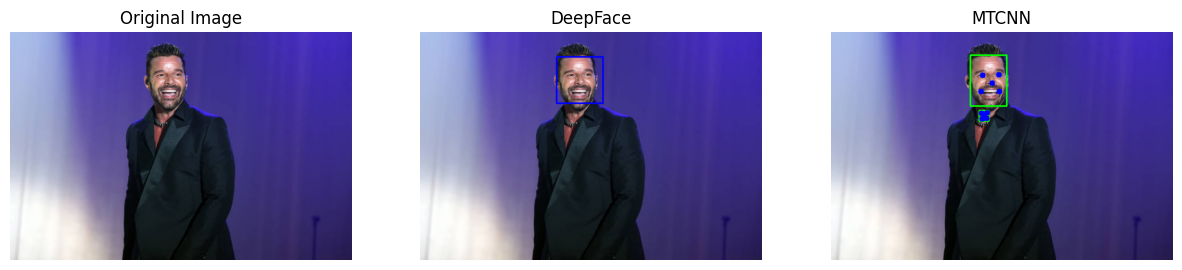

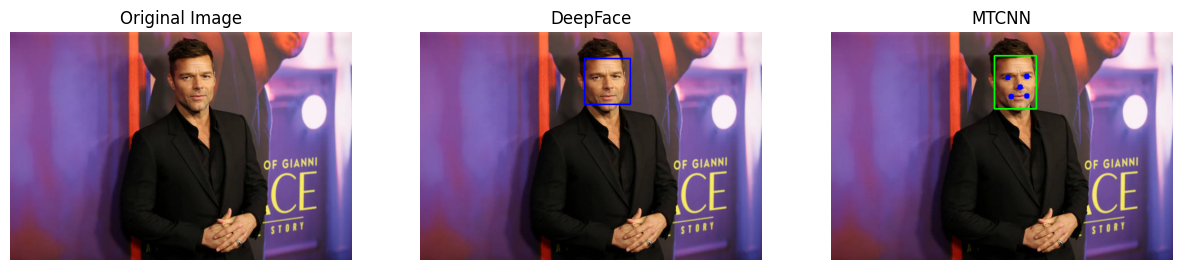

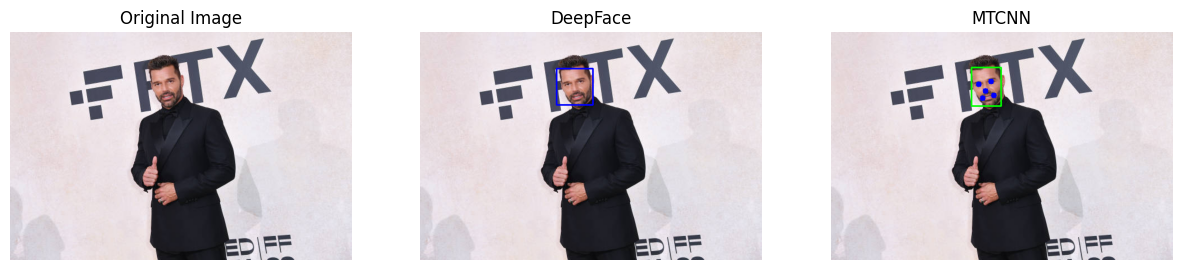

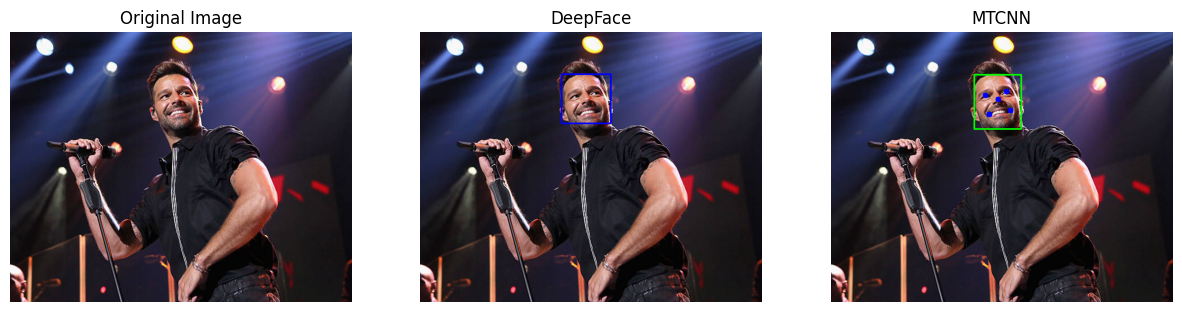

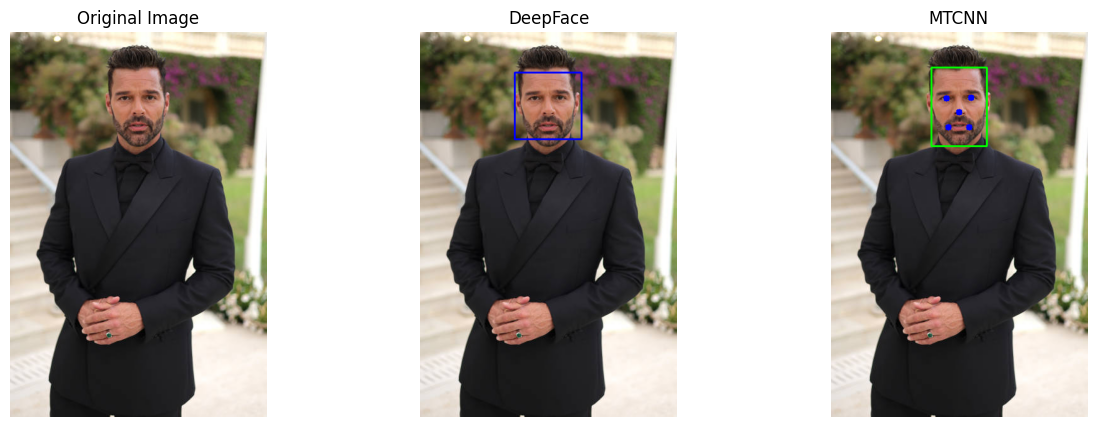

In [8]:
for img, img2, img3 in img_data:
    # use matplotlib to plot 3, one original, one with DeepFace, one with MTCNN
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    ax[0].imshow(img)
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    ax[1].imshow(img2)
    ax[1].set_title('DeepFace')
    ax[1].axis('off')

    ax[2].imshow(img3)
    ax[2].set_title('MTCNN')
    ax[2].axis('off')

    plt.show()